In [ ]:
# Import necessary libraries
import os
import cv2
import pandas as pd
import numpy as np
import torch
from google.colab import drive
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the data folder
data_path = '/content/drive/MyDrive/data'

Mounted at /content/drive


In [ ]:
# Read the CSV file with bounding box coordinates
bbox_df = pd.read_csv(os.path.join(data_path, 'train_solution_bounding_boxes (1).csv'))

submission_df = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'))

os.makedirs('/content/drive/MyDrive/data/resultsV8', exist_ok=True)

In [ ]:
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

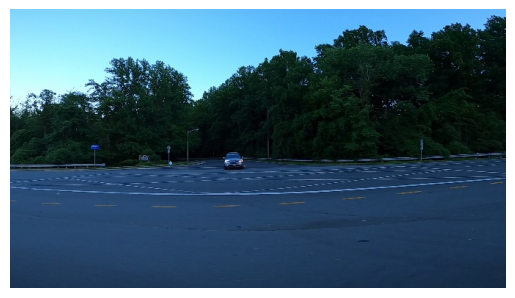

In [ ]:
example_img_path = os.path.join(data_path, 'training_images', bbox_df['image'].iloc[0])
example_img = load_image(example_img_path)
plt.imshow(example_img)
plt.axis('off')
plt.show()

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 28973, done.
remote: Counting objects: 100% (1178/1178), done.
remote: Compressing objects: 100% (726/726), done.
remote: Total 28973 (delta 772), reused 752 (delta 452), pack-reused 27795
Receiving objects: 100% (28973/28973), 14.89 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (20703/20703), done.


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 18.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
!pip install transformers

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 297MB/s]


In [ ]:
def detect_and_draw_boxes(image_path, model):
    img = load_image(image_path)
    results = model(img)
    annotated_img = results[0].plot()
    return annotated_img, results
img, results=detect_and_draw_boxes('/content/drive/MyDrive/data/training_images/vid_4_10100.jpg',model)


0: 384x640 1 car, 7.6ms
Speed: 3.8ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


array([[[166, 231, 253],
        [166, 231, 253],
        [167, 232, 254],
        ...,
        [155, 214, 254],
        [152, 214, 255],
        [152, 214, 255]],

       [[166, 231, 253],
        [166, 231, 253],
        [166, 231, 253],
        ...,
        [152, 214, 253],
        [152, 214, 253],
        [152, 214, 253]],

       [[168, 230, 251],
        [168, 230, 251],
        [168, 230, 251],
        ...,
        [153, 215, 252],
        [153, 215, 252],
        [151, 215, 251]],

       ...,

       [[ 43,  60,  76],
        [ 43,  60,  76],
        [ 42,  59,  75],
        ...,
        [ 29,  52,  68],
        [ 30,  53,  69],
        [ 29,  52,  68]],

       [[ 43,  58,  77],
        [ 42,  57,  76],
        [ 41,  58,  76],
        ...,
        [ 27,  50,  68],
        [ 28,  51,  69],
        [ 28,  51,  69]],

       [[ 43,  58,  77],
        [ 42,  57,  76],
        [ 40,  57,  75],
        ...,
        [ 28,  51,  69],
        [ 29,  52,  70],
        [ 30,  53,  71]]], dtype=uint8)
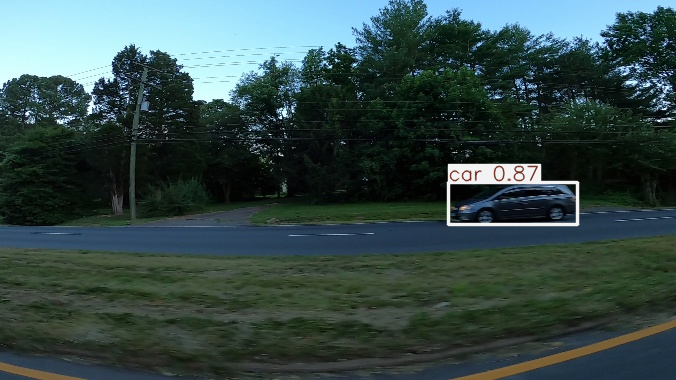

In [ ]:
img

In [ ]:
image_folder = os.path.join(data_path, 'training_images')
result_folder = '/content/drive/MyDrive/data/resultsV8'
predicted_boxes=[]

In [ ]:
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    detected_img, results = detect_and_draw_boxes(image_path, model)
    cv2.imwrite(os.path.join(result_folder, image_name), cv2.cvtColor(detected_img, cv2.COLOR_RGB2BGR))

    for box in results[0].boxes.data.tolist():
        x1, y1, x2, y2, conf, cls = box
        predicted_boxes.append({
            'image_name': image_name,
            'x1': x1,
            'y1': y1,
            'x2': x2,
            'y2': y2,
            'conf': conf,
            'class': cls
        })


0: 384x640 1 car, 19.2ms
Speed: 2.7ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bench, 13.7ms
Speed: 2.4ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 7.6ms
Speed: 2.7ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.0ms
Speed: 3.2ms preprocess, 11.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 7.1ms
Speed: 2.9ms preprocess, 7.1ms inference, 1.2ms postprocess per i

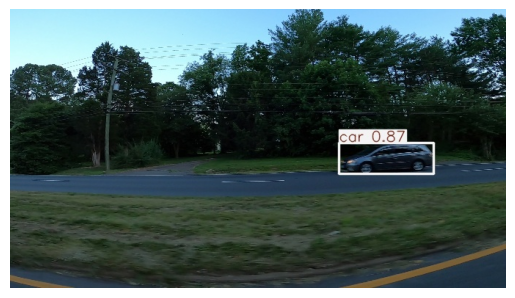

In [ ]:
result_img_path = os.path.join(result_folder, os.listdir(result_folder)[0])
result_img = load_image(result_img_path)
plt.imshow(result_img)
plt.axis('off')
plt.show()

In [ ]:
predicted_boxes_df = pd.DataFrame(predicted_boxes)

In [ ]:
def calculate_iou(box1, box2):
    x1_max = max(box1['xmin'], box2['x1'])
    y1_max = max(box1['ymin'], box2['y1'])
    x2_min = min(box1['xmax'], box2['x2'])
    y2_min = min(box1['ymax'], box2['y2'])

    inter_area = max(0, x2_min - x1_max) * max(0, y2_min - y1_max)

    box1_area = (box1['xmax'] - box1['xmin']) * (box1['ymax'] - box1['ymin'])
    box2_area = (box2['x2'] - box2['x1']) * (box2['y2'] - box2['y1'])

    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area

# Evaluate model performance
def evaluate_model(predicted_boxes_df, bbox_df, iou_threshold=0.5):
    tp = 0
    fp = 0
    fn = 0

    for _, gt_box in bbox_df.iterrows():
        image_name = gt_box['image']
        matching_pred_boxes = predicted_boxes_df[predicted_boxes_df['image_name'] == image_name]
        gt_box_dict = gt_box[['xmin', 'ymin', 'xmax', 'ymax']].to_dict()

        best_iou = 0
        best_pred_box = None

        for _, pred_box in matching_pred_boxes.iterrows():
            pred_box_dict = pred_box[['x1', 'y1', 'x2', 'y2']].to_dict()
            iou = calculate_iou(gt_box_dict, pred_box_dict)
            if iou > best_iou:
                best_iou = iou
                best_pred_box = pred_box

        if best_iou >= iou_threshold:
            tp += 1
        else:
            fn += 1

    fp = len(predicted_boxes_df) - tp

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    return precision, recall

In [ ]:
precision, recall = evaluate_model(predicted_boxes_df, bbox_df)
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}')

Precision: 0.5773, Recall: 0.9088


In [ ]:
f1=2*((0.5773*0.9088)/(0.5773+0.9088))
f1

0.7060766301056457